**This data contains customer information such as age, income, gender, and spending score. These variables will be helpful when deciding who to send offers to. **

In [ ]:
import pandas as pd 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

mail = pd.read_csv('Mall_Customers.csv')

Spending score and Annual income could possibly be redundant, but I dont think enough to have to remove either. These features have a distinct relationship as they help describe exactly who we are dealing with. 

In [ ]:
mail.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mail.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Univariate EDA for numerical features in the text on page 78

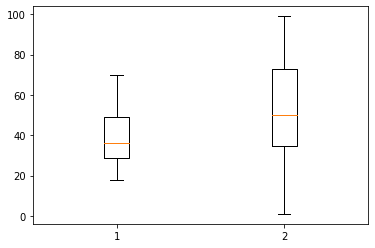

In [ ]:
data = mail['Age'], mail['Spending Score (1-100)']

plt.boxplot(data)
plt.show()

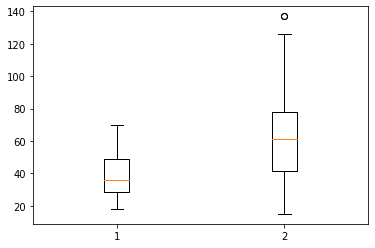

In [ ]:
data = mail['Age'], mail['Annual Income (k$)']

plt.boxplot(data)
plt.show()

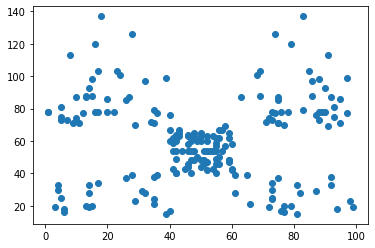

In [ ]:
#plotting data to determine amount of clusters. Fromt his plot we can see there are 5 distinguished groups (top left, center, top right, bottom left, bottom right)

plt.scatter(mail["Spending Score (1-100)"],mail["Annual Income (k$)"])

**2 Numericals**

In [ ]:
mail.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Converting several related attributes into a single category


In [ ]:
mail['Annual Spending'] = mail['Annual Income (k$)']+mail['Spending Score (1-100)']/2
mail.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Spending
0,1,Male,19,15,39,34.5
1,2,Male,21,15,81,55.5
2,3,Female,20,16,6,19.0
3,4,Female,23,16,77,54.5
4,5,Female,31,17,40,37.0


Binning numerical data to make it categorical

In [ ]:
#binning

min_value = mail['Spending Score (1-100)'].min()
max_value = mail['Spending Score (1-100)'].max()
print(min_value)
print(max_value)

1
99


In [ ]:
bins = np.linspace(min_value,max_value,4)
bins

array([ 1.        , 33.66666667, 66.33333333, 99.        ])

In [ ]:
labels = ['low', 'medium', 'high']
mail['bins'] = pd.cut(mail['Spending Score (1-100)'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
mail.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Spending,bins
0,1,Male,19,15,39,34.5,medium
1,2,Male,21,15,81,55.5,high
2,3,Female,20,16,6,19.0,low
3,4,Female,23,16,77,54.5,high
4,5,Female,31,17,40,37.0,medium


In [ ]:
#scaling data

scaler=MinMaxScaler()

mail['Spending Score (1-100)']=scaler.fit_transform(mail[['Spending Score (1-100)']])
mail["Annual Income (k$)"]=scaler.fit_transform(mail[['Annual Income (k$)']])

mail.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Spending,bins
0,1,Male,19,0.000000,0.387755,34.5,medium
1,2,Male,21,0.000000,0.816327,55.5,high
2,3,Female,20,0.008197,0.051020,19.0,low
3,4,Female,23,0.008197,0.775510,54.5,high
4,5,Female,31,0.016393,0.397959,37.0,medium


In [ ]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(mail[["Spending Score (1-100)","Annual Income (k$)"]])

In [ ]:
mail["k_cluster"]=y_predicted
mail.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Spending,bins,k_cluster
0,1,Male,19,0.000000,0.387755,34.5,medium,4
1,2,Male,21,0.000000,0.816327,55.5,high,0
2,3,Female,20,0.008197,0.051020,19.0,low,4
3,4,Female,23,0.008197,0.775510,54.5,high,0
4,5,Female,31,0.016393,0.397959,37.0,medium,4


In [ ]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(mail[['Spending Score (1-100)',"Annual Income (k$)"]])
mail.cluster=y_predicted
mail.head(50)

<ipython-input-33-e8633f604ca9>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mail.cluster=y_predicted


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Spending,bins,k_cluster
0,1,Male,19,0.000000,0.387755,34.5,medium,4
1,2,Male,21,0.000000,0.816327,55.5,high,0
2,3,Female,20,0.008197,0.051020,19.0,low,4
3,4,Female,23,0.008197,0.775510,54.5,high,0
4,5,Female,31,0.016393,0.397959,37.0,medium,4
5,6,Female,22,0.016393,0.765306,55.0,high,0
6,7,Female,35,0.024590,0.051020,21.0,low,4
7,8,Female,23,0.024590,0.948980,65.0,high,0
8,9,Male,64,0.032787,0.020408,20.5,low,4
9,10,Female,30,0.032787,0.724490,55.0,high,0


In [ ]:
km.cluster_centers_

array([[0.82783883, 0.58638083],
       [0.20319432, 0.09265859],
       [0.49508692, 0.33029751],
       [0.79962894, 0.08792846],
       [0.16443149, 0.6       ]])

In [ ]:
#elbow method for values

k_rng=range(1,11)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(mail[['Spending Score (1-100)',"Annual Income (k$)"]])
    sse.append(km.inertia_)

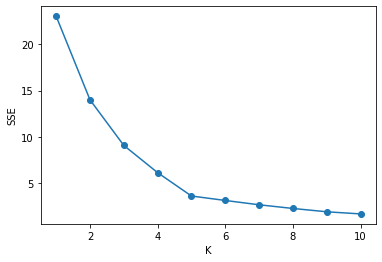

In [ ]:
#plotting results

plt.xlabel('K')
plt.ylabel('SSE')

plt.plot(k_rng,sse)
plt.scatter(k_rng,sse)